In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)
import plotly.graph_objects as go
cf.go_offline()

In [2]:
arr1 = np.random.randn(50,4)

In [7]:
df1 = pd.DataFrame(arr1, columns = ['A','B','C','D'])

In [9]:
df1.head()

,A,B,C,D
0,0.196282,1.416419,-0.343678,-1.776147
1,-0.096259,-0.403767,0.230485,-0.017131
2,-0.172203,1.642461,1.313036,0.103796
3,0.894386,-0.370996,2.209789,0.077838
4,-0.450888,0.814494,0.110149,0.072677


<Axes: >

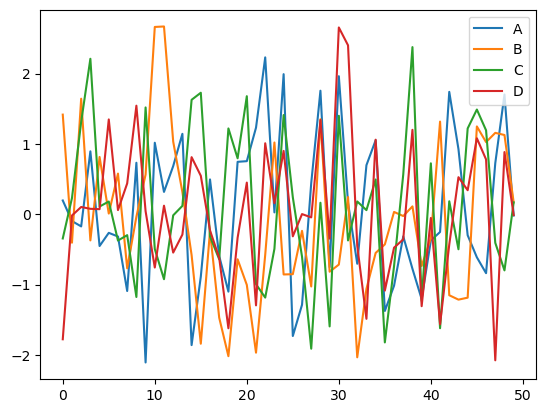

In [10]:
df1.plot()

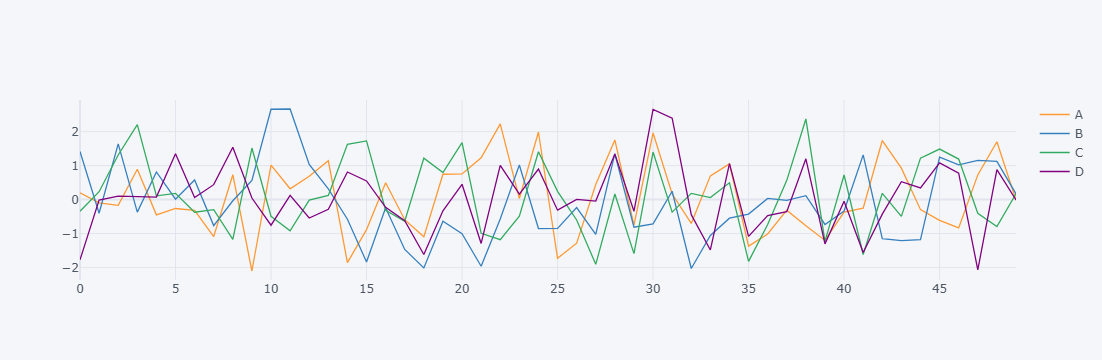

In [11]:
df1.iplot()

<h3> Line Plot</h3>

In [13]:
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [34]:
df_stocks.shape

(105, 7)

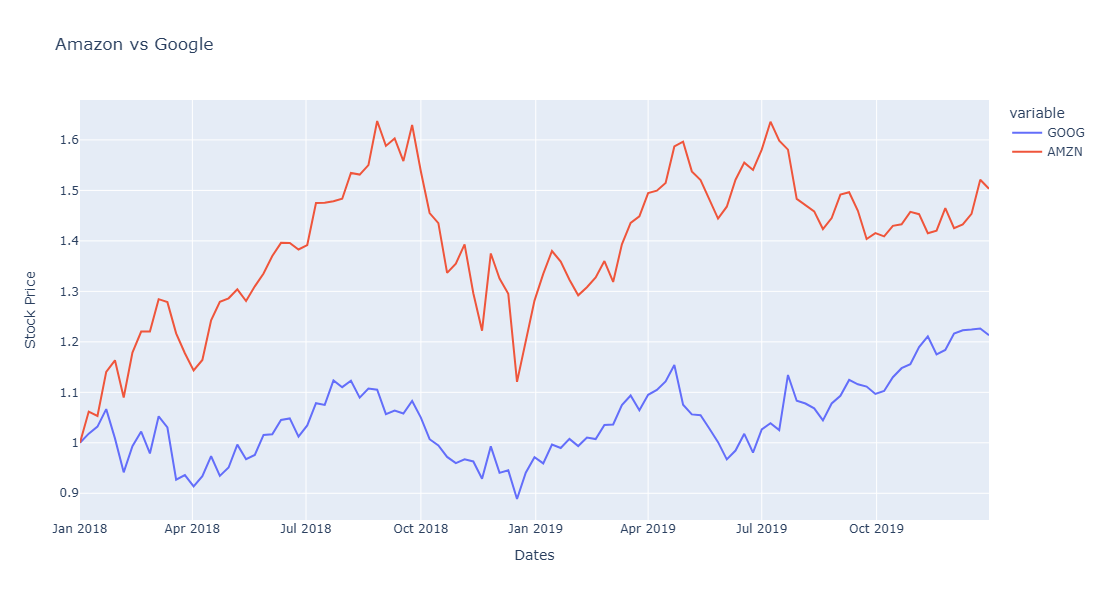

In [43]:
px.line(data_frame = df_stocks, x = 'date', y = ["GOOG", "AMZN"], 
        labels = {'date':"Dates", 'value':"Stock Price"}, title = "Amazon vs Google",
       width=1000, height = 600).show()

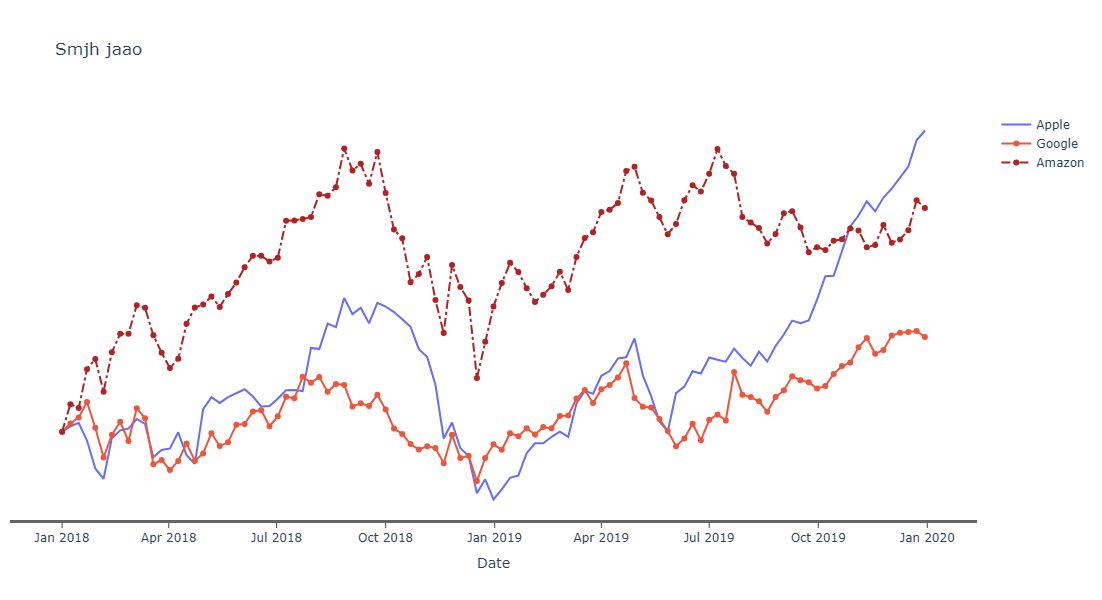

In [94]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AAPL, mode = 'lines', name = "Apple"))
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.GOOG, mode = 'lines+markers',
                         name = "Google"))
fig.add_trace(go.Scatter(x = df_stocks.date, y = df_stocks.AMZN, mode = 'lines+markers', 
                         name = "Amazon", line=dict(color = 'firebrick',width=2, dash = 'dashdot')))
fig.update_layout( width=1100, height = 600, title = "Smjh jaao", xaxis_title = "Date")
fig.update_layout(xaxis = dict(showline = True, showgrid = False, showticklabels = True, 
                               linecolor = 'rgb(100,100,100)', linewidth=3, ticks="outside"),
                 yaxis = dict(showgrid = False, showline = False, zeroline=False, showticklabels=False),
                 autosize = False,
                 margin=dict(autoexpand=False, l=10, r=125, t=110), showlegend=True, plot_bgcolor='white')

fig.show()

### Bar Charts

In [95]:
df2 = px.data.gapminder()

In [101]:
df2.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [133]:
pd.concat([df2[df2["country"]=="India"],  df2[df2["continent"]=="Americas"]], axis = 0)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356
...,...,...,...,...,...,...,...,...
1639,Venezuela,Americas,1987,70.190,17910182,9883.584648,VEN,862
1640,Venezuela,Americas,1992,71.150,20265563,10733.926310,VEN,862
1641,Venezuela,Americas,1997,72.146,22374398,10165.495180,VEN,862
1642,Venezuela,Americas,2002,72.766,24287670,8605.047831,VEN,862


In [137]:
df2.query("country == ['India','United States']")

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
696,India,Asia,1952,37.373,372000000,546.565749,IND,356
697,India,Asia,1957,40.249,409000000,590.061996,IND,356
698,India,Asia,1962,43.605,454000000,658.347151,IND,356
699,India,Asia,1967,47.193,506000000,700.770611,IND,356
700,India,Asia,1972,50.651,567000000,724.032527,IND,356
701,India,Asia,1977,54.208,634000000,813.337323,IND,356
702,India,Asia,1982,56.596,708000000,855.723538,IND,356
703,India,Asia,1987,58.553,788000000,976.512676,IND,356
704,India,Asia,1992,60.223,872000000,1164.406809,IND,356
705,India,Asia,1997,61.765,959000000,1458.817442,IND,356


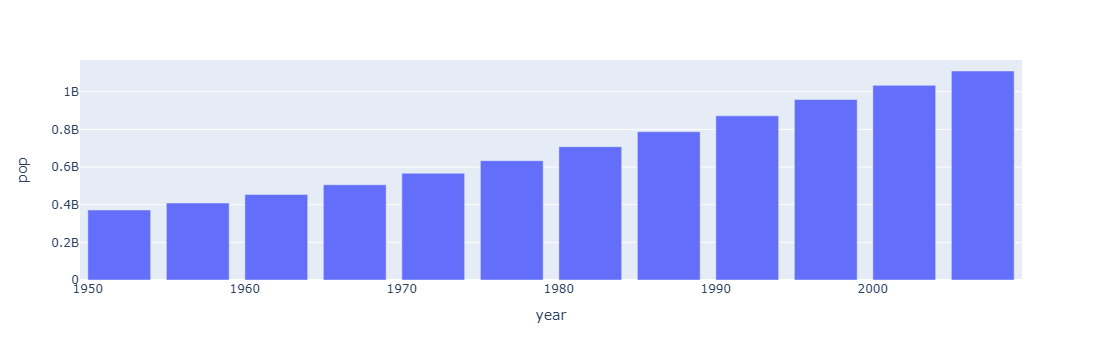

In [144]:
px.bar(df2.query("country == ['India']"), x='year', y='pop')

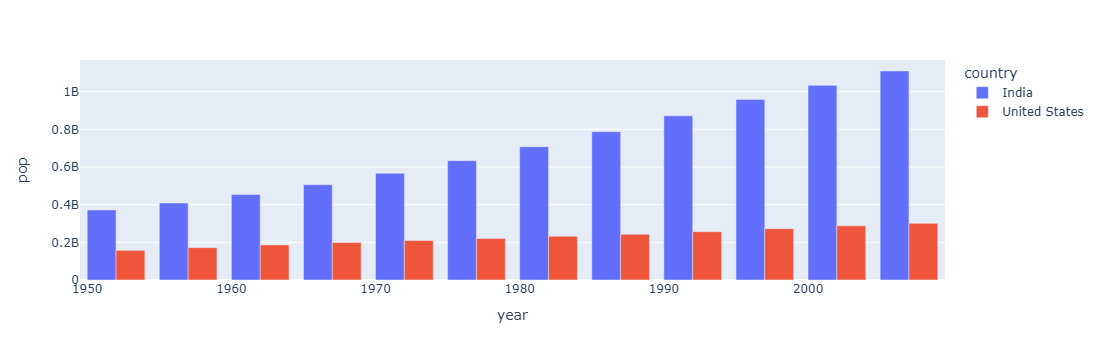

In [161]:
px.bar(df2.query("country == ['India','United States']"), x='year', y='pop', color='country', 
       barmode='group', height=600)

In [145]:
df3 = px.data.tips()

In [146]:
df3.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


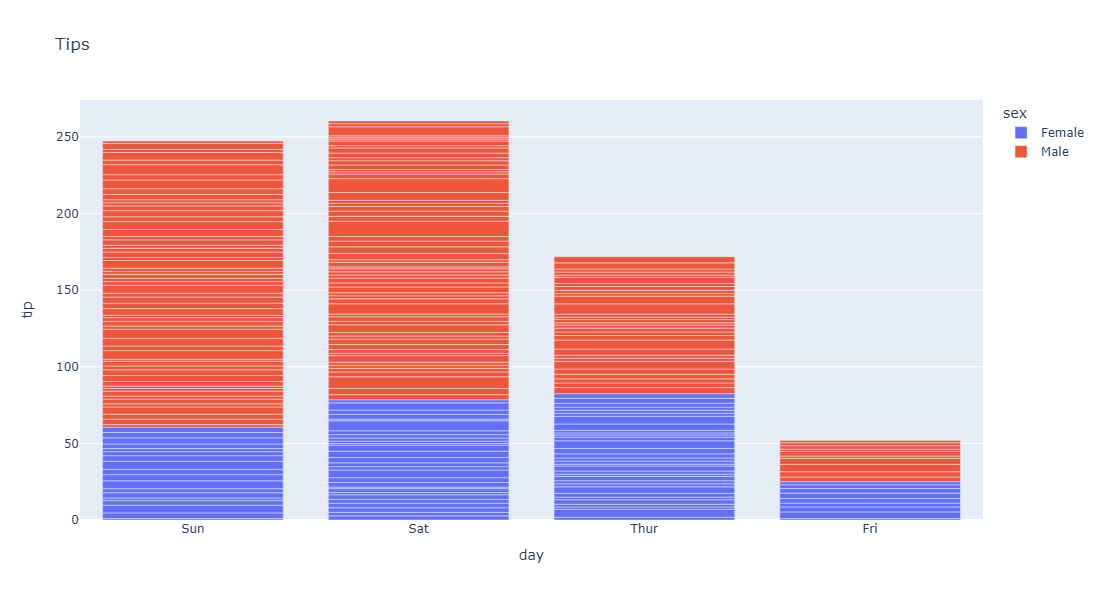

In [150]:
px.bar(df3, x='day', y='tip', color='sex', title="Tips", height=600)

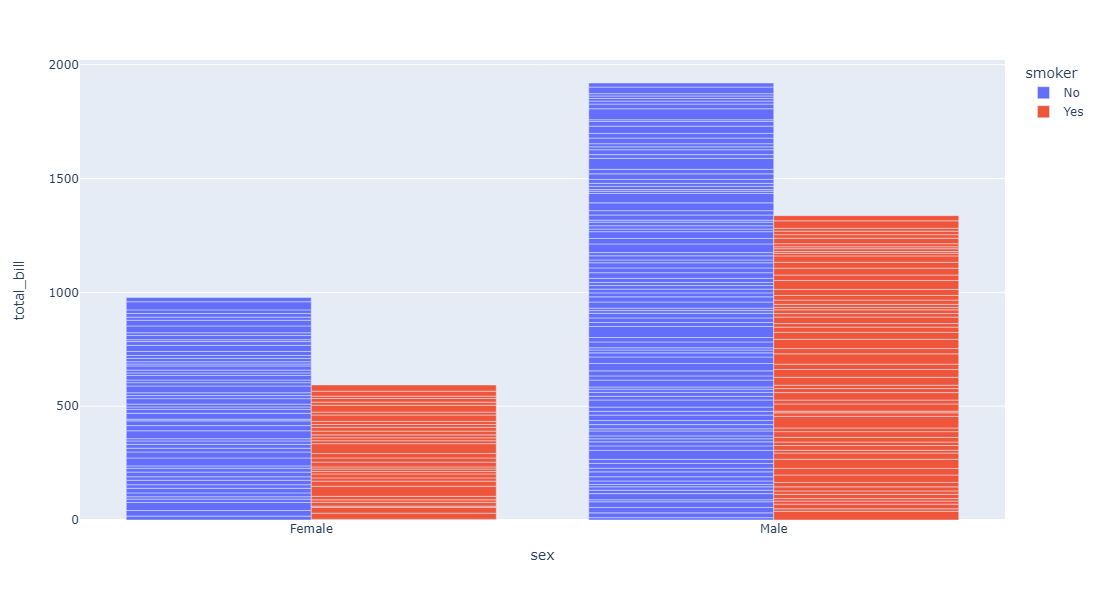

In [156]:
px.bar(df3, x="sex", y="total_bill", color="smoker", barmode='group', height=600)

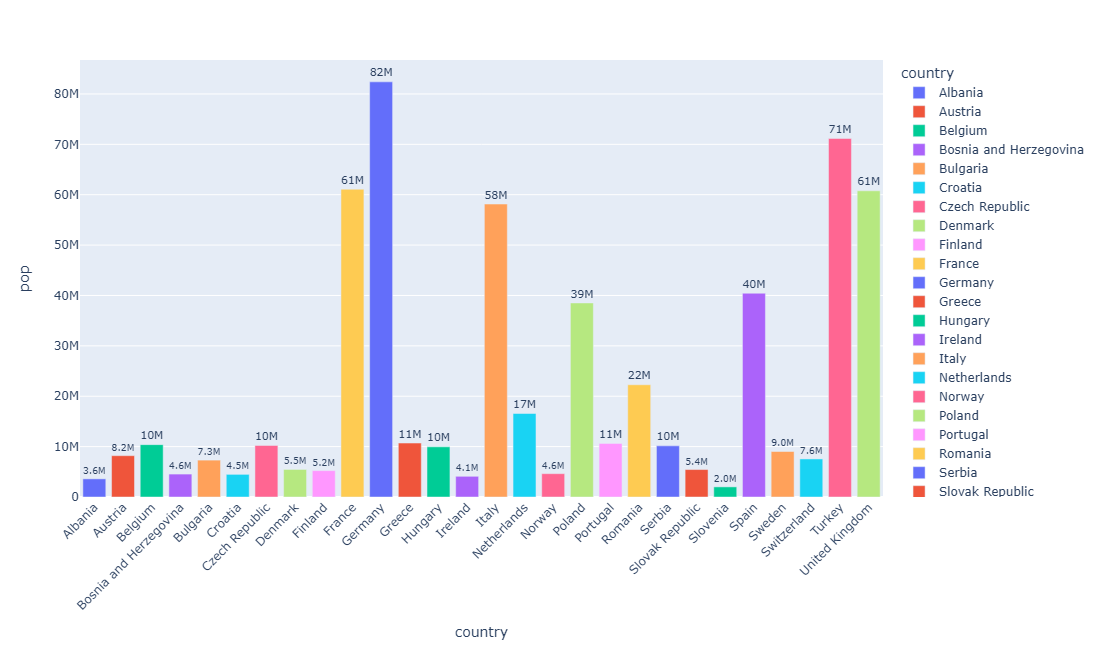

In [178]:
df2.query("continent =='Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df2.query("continent =='Europe' and year == 2007 and pop > 2.e6"), y = 'pop', x='country',
            text='pop', color='country', height=650)
fig.update_traces(texttemplate = '%{text:.2s}', textposition = 'outside')
fig.update_layout(xaxis_tickangle = -45)
fig.show()

### Scatter Plot

In [180]:
df4 = px.data.iris()
df4.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


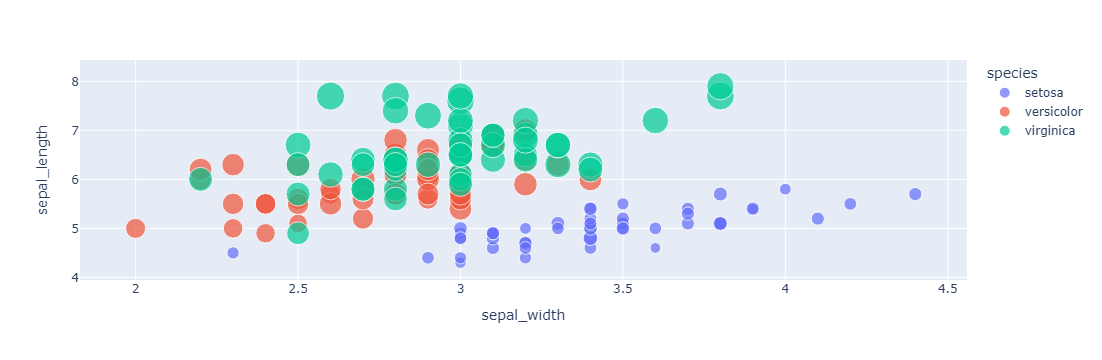

In [187]:
px.scatter(df4, x = 'sepal_width', y='sepal_length', color='species', size = 'petal_length', 
           hover_data=["petal_width"])

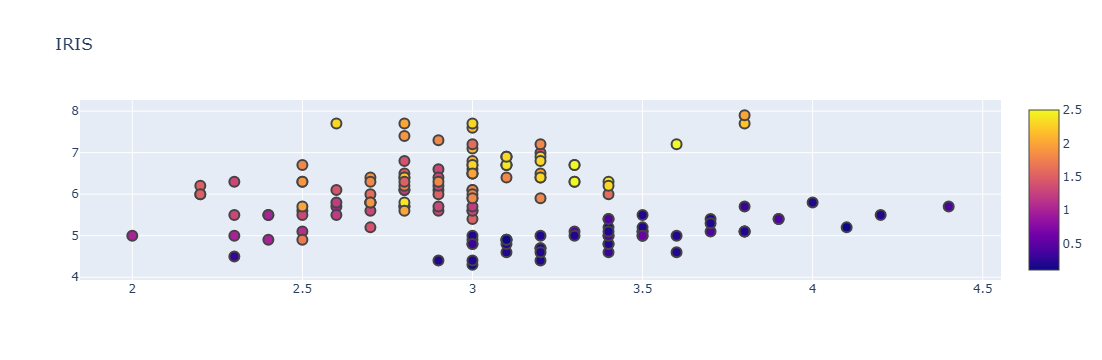

In [216]:
fig = go.Figure()
fig.add_traces(go.Scatter(x = df4.sepal_width, y=df4.sepal_length, mode='markers', 
                          marker_color=df4.petal_width, text = df4.species, marker = dict(showscale=True)))
fig.update_traces(marker_line_width=2, marker_size=10)
fig.update_layout(height = 600, title = "IRIS")
fig.show()

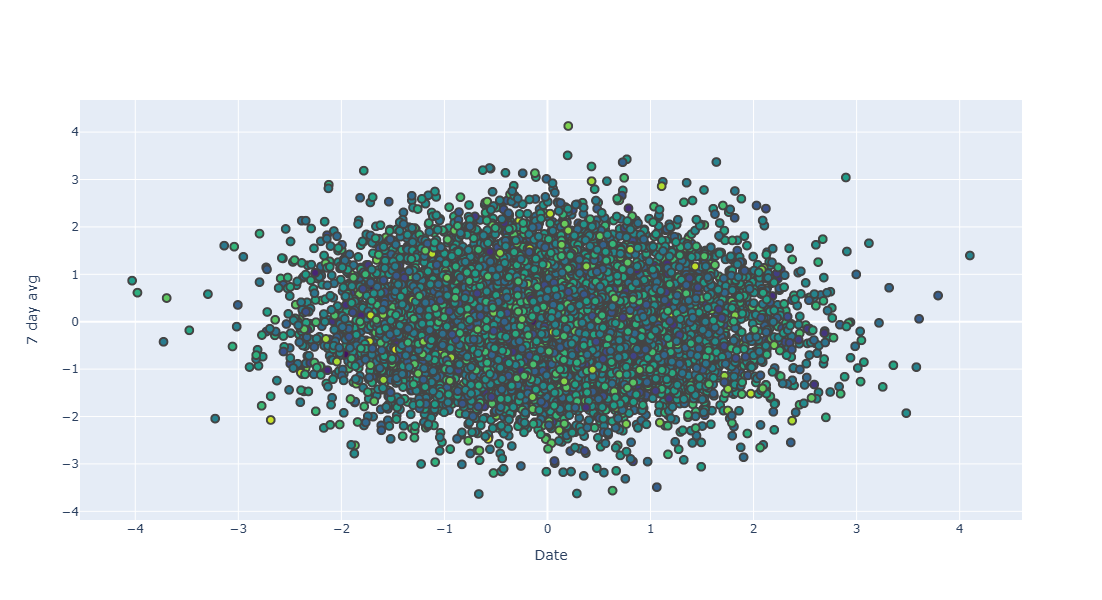

In [5]:
fig = go.Figure(data = go.Scattergl(x = np.random.randn(10000), y = np.random.randn(10000), 
                                   mode = 'markers', marker = dict(color=np.random.randn(10000),
    colorscale = 'Viridis', line_width=2, size=8))).update_layout(height = 600, xaxis_title="Date", yaxis_title="7 day avg")
fig.show()

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)
final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T
z_arr = []
for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))
z_arr = np.array(z_arr).reshape(10,10)
fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])
fig.update_layout(title='Cost Function vs m and b both', autosize=False,width=800, height=700,
                  margin=dict(l=65, r=50, b=65, t=90), scene = dict(
                    xaxis_title='m',
                    yaxis_title='b',
                    zaxis_title='cost_function'))
fig.show()